In [2]:
import pandas as pd

df = pd.read_csv('ranks.csv')
df.head()

,dataset,method,rank_r2,rank_size
0,1027_ESL,ElasticNet,8.0,2.0
1,1027_ESL,Feat,2.0,3.0
2,1027_ESL,FeatCN,4.0,5.0
3,1027_ESL,FeatCorr,3.0,4.0
4,1027_ESL,KernelRidge,1.0,NaN


/home/bill/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


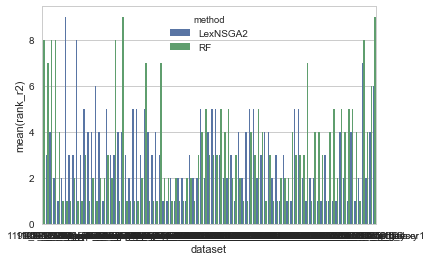

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.barplot(data=df[df.method.isin(['LexNSGA2','RF'])],y='rank_r2',x='dataset',hue='method')
plt.show()

In [3]:
datasets = []
for g,dfg in df.groupby('dataset'):
    if (dfg[dfg.method=='LexNSGA2']['rank_r2'].median() < dfg[dfg.method=='RF']['rank_r2'].median() and
        dfg[dfg.method=='LexNSGA2']['rank_r2'].median() < dfg[dfg.method=='ElasticNet']['rank_r2'].median()):
        print(g)
        datasets.append(g)
datainfo = pd.read_csv('Regression_datasets_pmlb.tsv',sep='\t')
for d in datasets:
#     print(d)
    di = datainfo[datainfo.name == '_'.join(d.split('_')[1:])]
    print(di['name'].values,di['NumberOfInstances'].values,di['NumberOfFeatures'].values)

In [50]:
np.random.randint(2**15-1)

16681

In [75]:
from feat import Feat
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import numpy as np
# dataset='192_vineyard'
dataset='690_visualizing_galaxy'
X, y = fetch_data(dataset,return_X_y=True)
X_t,X_v, y_t, y_v = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

# est = Feat(backprop=True,
#            random_state=1398743,
#            pop_size=100,
#            gens=100,
#            ml = "LinearRidgeRegression",
#            sel='lexicase',
#            surv='nsga2',
#            max_depth=10,
#            max_dim=min([X.shape[1]*2,50]),
#            )
random_state=11314
fest = Feat(obj="fitness,complexity",                                                            
               pop_size=500,                                                                        
               gens=200,                                                                            
               max_time=600,                                                                        
               use_batch=True,                                                                      
               batch_size=1000,                                                                     
               ml = "LinearRidgeRegression",                                                        
               sel='lexicase',                                                                      
               surv='nsga2',                                                                        
               max_depth=6,                                                                         
               max_dim=min([X.shape[1]*2,50]),                                                      
               random_state=random_state,                                                            
               backprop=True,                                                                       
               iters=10,                                                                            
               n_threads=1,                                                                         
               verbosity=2,                                                                         
               logfile='feat_'+dataset+'.log',
               print_pop=1) 

fest.fit(X_t,y_t)



test_score['feat'] = mse(y_v,fest.predict(X_v))

str_arc = fest.get_archive()

print(fest.get_archive())

complexity,fitness,fitness_v,eqn
1	1825.754552	1790.440368	[x_1]
2	986.547630	824.236442	[x_3][x_1]
3	955.940666	790.250743	[x_2][x_1][x_3]
4	937.824253	756.152977	[x_1][x_2][x_0][x_3]
5	937.824253	756.153133	[x_1][x_2][x_0][x_1][x_3]
6	732.349209	725.516450	[x_0][relu(x_1)][x_1]
7	477.343916	514.370762	[tanh(x_1)][x_3]
8	434.340981	477.437478	[x_0][tanh(x_1)][x_3]
9	400.619536	396.818240	[x_0][tanh(x_1)][x_2][x_3]
10	395.935752	393.476845	[x_1][x_0][x_2][tanh(x_1)][x_3]
12	393.174417	369.497455	[tanh(x_0)][tanh(x_1)]
13	357.898089	327.969133	[tanh(x_0)][tanh(x_1)][x_2]
14	332.435066	291.238088	[tanh(x_1)][x_2][tanh(x_0)][x_3]
15	330.259762	286.474480	[tanh(x_1)][x_3][x_2][tanh(x_0)][x_1]
16	329.137984	293.484161	[x_1][x_0][x_2][tanh(x_1)][tanh(x_0)][x_3]
17	319.446620	272.813163	[tanh(x_1)][relu(x_3)][x_2][tanh(x_0)]
18	316.419919	274.623401	[tanh(x_1)][relu(x_3)][x_2][tanh(x_0)][x_3]
19	315.033011	269.581290	[x_1][relu(x_3)][x_2][tanh(x_1)][tanh(x_0)][x_3]
20	291.131655	283.289836	[t

In [53]:
from feat import Feat
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

X, y = fetch_data(dataset,return_X_y=True)
X_t,X_v, y_t, y_v = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

rf = RandomForestRegressor(random_state=987039487)

rf.fit(X_t,y_t)

# test_score={}

test_score['rf'] = mse(y_v,rf.predict(X_v))


In [54]:
from feat import Feat
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import ElasticNet

X, y = fetch_data(dataset,return_X_y=True)
X_t,X_v, y_t, y_v = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

linest = ElasticNet()

linest.fit(X_t,y_t)

# test_score={}

test_score['elasticnet'] = mse(y_v,linest.predict(X_v))


In [60]:
test_score['feat'] = mse(y_v,fest.predict(X_v))
test_score

{'feat': 254.0539790633308,
 'rf': 384.1365432098763,
 'elasticnet': 919.3515337699562}

complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 42, 43, 46, 48, 49, 52, 54]


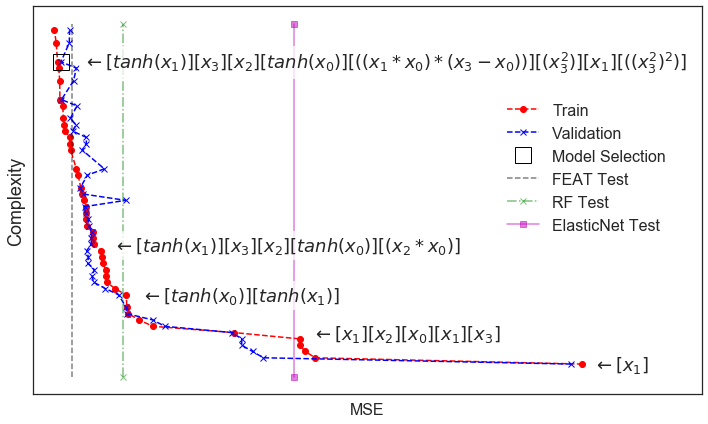

In [163]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline 
sns.set_style('white')
complexity = []
fit_train = []
fit_val = []
fit_test = []
eqn = []
h = plt.figure(figsize=(10,6))


for s in str_arc.split('\n')[1:-1]:
#     print(s.split(','))
    line = s.split('\t')
    complexity.append(int(line[0]))
    fit_train.append(float(line[1]))
    fit_test.append(float(line[2]))
    eqn.append(','.join(line[3:]))
    eqn[-1].replace('sqrt','\sqrt')
#     print(s)
plt.plot(fit_train,complexity,'--ro',label='Train',markersize=6)
plt.plot(fit_test,complexity,'--bx',label='Validation')
best = np.argmin(np.array(fit_test))
plt.plot(fit_test[best],complexity[best],'sk',markersize=16,markerfacecolor='none',label='Model Selection')

# test score lines
y1 = -1
y2 = 55
plt.plot((test_score['feat'],test_score['feat']),(y1,y2),'--k',label='FEAT Test',alpha=0.5)
plt.plot((test_score['rf'],test_score['rf']),(y1,y2),'-.xg',label='RF Test',alpha=0.5)
plt.plot((test_score['elasticnet'],test_score['elasticnet']),(y1,y2),'-sm',label='ElasticNet Test',alpha=0.5)

print('complexity',complexity)
eqn[-1] = '0)]$\n$'.join(eqn[-1].split('0)]'))
# complexity[-1] = complexity[-1]-10 # adjust placement of last equation
xoff = 70
for e,t,c in zip(eqn,fit_test,complexity):
    if c in [1,5,12,20,49]:
        if c == 5: 
            t = t+150
            c = c+1
        elif c==1: t = t
        elif c==54: t = t-xoff/2
        if c == 54:
            plt.text(t+xoff,c-1,'> overfitting',size=18)
        else:
            tax = plt.text(t+xoff,c-1,'$\leftarrow'+e+'$',size=18)
            tax.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='none'))

l = plt.legend(prop={'size': 16},loc=[0.7,0.4])
plt.xlabel('MSE',size=16)
# plt.gca().set_ylim(10,200)
plt.gca().set_xlim(100,right=2200)
# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')

# plt.ylim(y1,y2)
plt.gca().set_yticklabels('')
plt.gca().set_xticklabels('')

plt.ylabel('Complexity',size=18)
h.tight_layout()
h.savefig('../paper/figs/archive_example.pdf')
# plt.xticklabels(size=12)
plt.show()

In [138]:
model = fest.get_model()
for m in model.split('\n')[1:-1]:
    phi = m.split('\t')[0].replace('tanh','\\tanh').replace('*',' \\cdot ')
    beta = m.split('\t')[1]
    print('$'+phi+'$','&',round(float(beta),1),end=' \\\\\n')

$\tanh(x_1)$ & 2953.8 \\
$x_1$ & 1961.5 \\
$(x_3^2)$ & 329.0 \\
$\tanh(x_0)$ & -318.5 \\
$((x_1 \cdot x_0) \cdot (x_3-x_0))$ & 303.6 \\
$((x_3^2)^2)$ & -288.7 \\
$x_3$ & 203.3 \\
$x_2$ & 64.8 \\
